In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('data/titanic_train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
#342
print('Доля выживших: ', df['Survived'].mean(),'\n из них женщин: ', 
      round(df[df['Sex'] == 'female']['Survived'].sum()/df['Survived'].count(),2)
)

print("\nотносительно количества выживших, выжило ")
print(
    ' в 1 классе:',
    round(df[df['Pclass'] == 1]['Survived'].sum()/df['Survived'].sum(), 2),'\n\t из них женщин:',
    round(df[ (df['Sex'] == 'female') & (df['Pclass'] == 1) ]['Survived'].sum()/df['Survived'].sum(),2),'\n',
    
    'во 2 классе:',
    round(df[df['Pclass'] == 2]['Survived'].sum()/df['Survived'].sum(), 2),'\n\t из них женщин:',
    round(df[ (df['Sex'] == 'female') & (df['Pclass'] == 2) ]['Survived'].sum()/df['Survived'].sum(),2),'\n',
    
    'в 3 классе:',
    round(df[df['Pclass'] == 3]['Survived'].sum()/df['Survived'].sum(), 2),'\n\t из них женщин:',
    round(df[ (df['Sex'] == 'female') & (df['Pclass'] == 3) ]['Survived'].sum()/df['Survived'].sum(),2),'\n',
    
)

print("\nОтносительно самого класса")
print(' в 1 классе выжило:', 
     round(df[df['Pclass'] == 1]['Survived'].mean(), 2),'\n\t из них женщин:',
     round(df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].sum() / df[df['Pclass'] == 1]['Survived'].count(),2),'\n', 
'во 2 классе выжило:', 
     round(df[df['Pclass'] == 2]['Survived'].mean(),2),'\n\t из них женщин:',
     round(df[(df['Sex'] == 'female') & (df['Pclass'] == 2)]['Survived'].sum() / df[df['Pclass'] == 2]['Survived'].count(),2),'\n', 
'в 3  классе выжило:', 
     round(df[df['Pclass'] == 3]['Survived'].mean(),2),'\n\t из них женщин:', 
     round(df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]['Survived'].sum() / df[df['Pclass'] == 3]['Survived'].count(),2),'\n', 
)

print("Наибольшее количество из выживших находилось в 1 классе, "+
      "в нем также самая большая доля выживших. Вероятность выжить " + 
      "у женщин больше, чем у мужчин. В 3 классе наибольшее число путешествующих" +
      "и погибших. Доля выживших женщин во 2 классе, превышает долю в 1 и 3 классах"
)


Доля выживших:  0.3838383838383838 
 из них женщин:  0.26

относительно количества выживших, выжило 
 в 1 классе: 0.4 
	 из них женщин: 0.27 
 во 2 классе: 0.25 
	 из них женщин: 0.2 
 в 3 классе: 0.35 
	 из них женщин: 0.21 


Относительно самого класса
 в 1 классе выжило: 0.63 
	 из них женщин: 0.42 
 во 2 классе выжило: 0.47 
	 из них женщин: 0.38 
 в 3  классе выжило: 0.24 
	 из них женщин: 0.15 

Наибольшее количество из выживших находилось в 1 классе, в нем также самая большая доля выживших. Вероятность выжить у женщин больше, чем у мужчин. В 3 классе наибольшее число путешествующихи погибших. Доля выживших женщин во 2 классе, превышает долю в 1 и 3 классах


In [171]:
print('Таблица сопряженности для порта и класса. \n')
pd.crosstab(df.Pclass, df.Embarked, normalize=False)

Таблица сопряженности для порта и класса. 



Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [147]:
print("таже таблица, но для выживших")
pd.crosstab(df[df['Survived']==1].Pclass, df[df['Survived']==1].Embarked, normalize=False)

таже таблица, но для выживших


Embarked,C,Q,S
Pclass,,,
1,59,1,74
2,9,2,76
3,25,27,67


In [148]:
#Видно, что наибольшие потери принадлежат пассажирам 3 класса 
#отбывшим из Саутгемптона
#В Саутгемптоне также село наибольшее число пассажиров

In [149]:
print("Основную статистика по классам ")
numeric = ['Age' , 'Fare']
df.groupby("Pclass")[numeric].describe()

Основную статистика по классам 


Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Pclass                                                                     
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                                                                      
             mean        std  min       25%      50%   75%       max  
Pclass                                                                
1       84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292  
2       20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000  
3       13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [172]:
print('Cводная таблица')     
df.pivot_table(['Fare', 'Age'], ['Sex', 'Survived'], aggfunc="median").head()

Cводная таблица


Age      Fare
Sex    Survived                
female 0         24.5  15.24580
       1         28.0  26.00000
male   0         29.0   9.41665
       1         28.0  26.28750

In [151]:
#Средний возраст выживших мужчин и женщин совпадает и = 28 лет. 
#В среднем выжившие заплатили за билет больше

Количество путеществующих ж и м


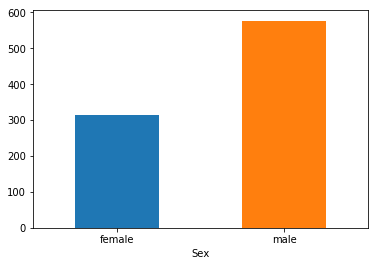

In [152]:
print("Количество путеществующих ж и м")
df.groupby('Sex')['Survived'].count().plot(kind="bar",  rot=0)

Доля выживших между м и ж


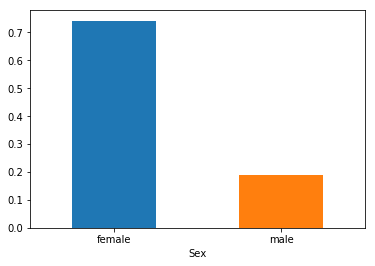

In [173]:
print("Доля выживших между м и ж")
df.groupby('Sex')['Survived'].mean().plot(kind="bar", rot="360")

Доля выживших в зависимости от класса


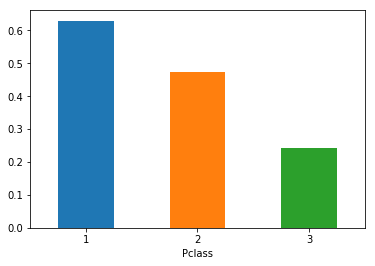

In [154]:
print("Доля выживших в зависимости от класса")
df.groupby('Pclass')['Survived'].mean().plot(kind="bar",  rot=0)

Количество выживших и не выживших относительно классов


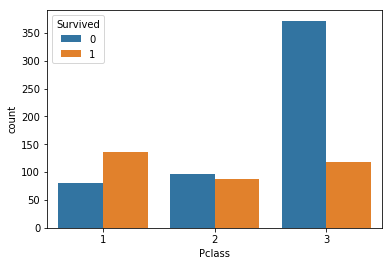

In [155]:
print("Количество выживших и не выживших относительно классов")
sns.countplot(x='Pclass', hue='Survived', data=df)

In [156]:
#наибольшее количество пассажиров были мужчины. Доля выживших 
#среди женщин намного больше, чем у мужчин. Наибольшее число 
#пассажиров путешествовало 3 классом, в нем же наблюдаятся самая большая 
#доля погибших. Самый большой шанс выжить наблюдается у пассажиров 
#1 класса

Количество пассажиров с n-количеством родственников на борту


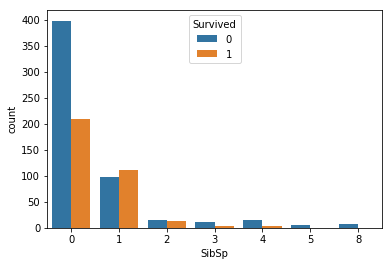

In [174]:
print("Количество пассажиров с n-количеством родственников на борту")
sns.countplot(x='SibSp', hue="Survived", data=df)

Доля выживших, в зависимости от количества родственников на борту


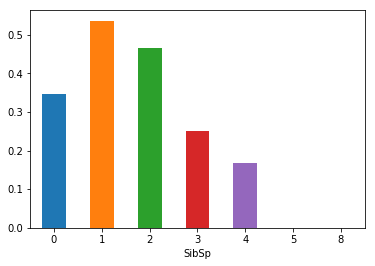

In [158]:
print("Доля выживших, в зависимости от количества родственников на борту")
df.groupby("SibSp")['Survived'].mean().plot(kind="bar",  rot=0)


Количество пассажиров с n-количеством родителей и детей на борту


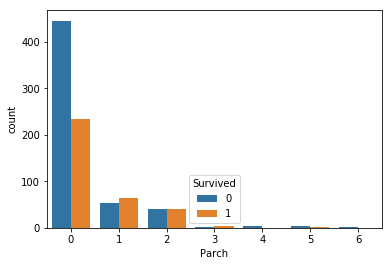

In [159]:
print("Количество пассажиров с n-количеством родителей и детей на борту")
sns.countplot(x='Parch', hue="Survived", data=df)

Доля выживших, в зависимости от количества родителей и детей на борту


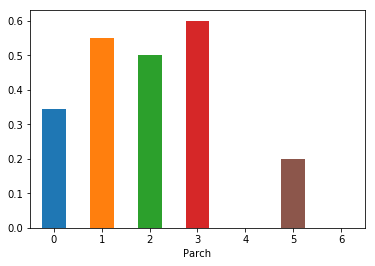

In [160]:
print("Доля выживших, в зависимости от количества родителей и детей на борту")
df.groupby("Parch")['Survived'].mean().plot(kind="bar", rot=0)

In [161]:
#Наибольшее количество людей путешествовало без Parch и SibSp
#При этом, шанс выжить больше у людей путешествующих c 1 или 2 Parch или 
#с 1 или 3 SibSp

Корреляционная матрица для колличественных признаков


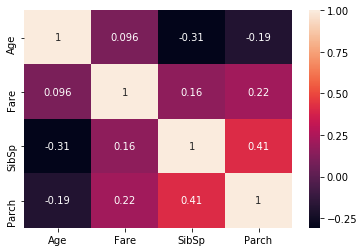

In [162]:
print('Корреляционная матрица для колличественных признаков')
corrm = df[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(corrm, annot=True)

In [163]:
 #наиболее коррелируемыми признаками являются Parch и SibSp

Распределение количественнх признаков


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb068352da0>,
      dtype=object)

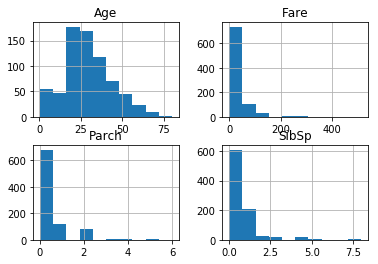

In [164]:
print("Распределение количественнх признаков")
df[['Age', 'Fare', 'SibSp', 'Parch']].hist()

In [165]:
#наибольшее число пассажиров имело возраст в районе 30 лет,
#путешествовало по недорогим билетам, одни или с 1-2 родственниками

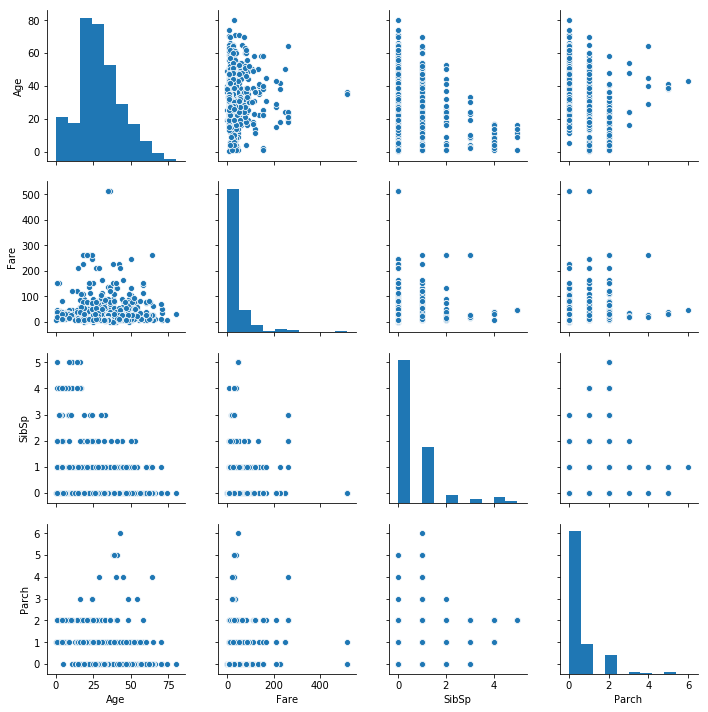

In [166]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch']].dropna())

Статистика распределения количественных признаков


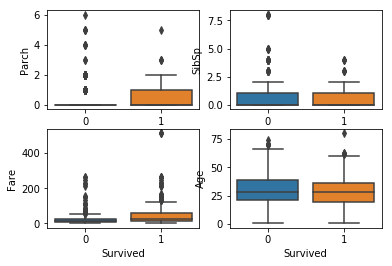

In [167]:
print("Статистика распределения количественных признаков")
import math
columns = ['Parch', 'SibSp', 'Fare', 'Age']
fig, axes = plt.subplots(nrows=2, ncols=2)
for idx, feat in enumerate(columns):
    a = math.floor(idx / 2)    
    sns.boxplot(x='Survived', y=feat, data=df, ax=axes[a, idx%2])    
    axes[a, idx%2].set_xlabel('Survived')
    axes[a, idx%2].set_ylabel(feat)

In [168]:
#средний возраст выживших и не выживших примерно одинаков, 
#более молодые пассажиры имеют больший шанс выжить


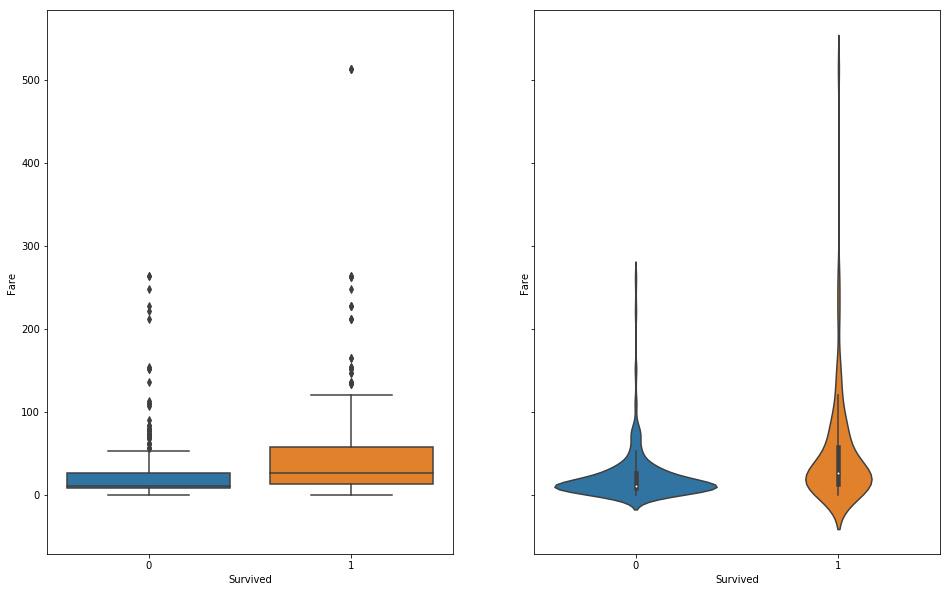

In [169]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,10))
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[0])
sns.violinplot(x='Survived', y='Fare', data=df, ax=axes[1])

Подглядывание в n-мерное пространство с t-SNE


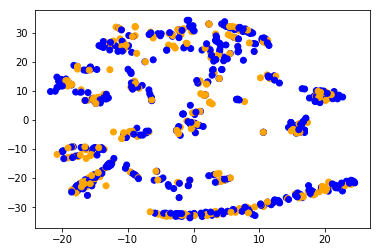

In [170]:
print("Подглядывание в n-мерное пространство с t-SNE")

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

x = df.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)
x['Sex'] = pd.factorize(x['Sex'])[0]
x['Embarked'] = pd.factorize(x['Embarked'])[0]
x = x.dropna()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(x_scaled)
plt.figure()
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1],
            c=df['Survived'].map({0: 'blue', 1: 'orange'}));